In [1]:
#################3 Here I load all I needed packages for whole code #########################3
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score ,recall_score ,f1_score ,confusion_matrix ,classification_report ,roc_auc_score ,roc_curve ,average_precision_score , log_loss, cohen_kappa_score


################## Load the dataset for first 5 row ################
df = pd.read_csv(r"C:\Users\bittu\Downloads\employee_productivity 1.csv")
df.head(5)


,Employee_ID,Age,Gender,Education_Level,Years_of_Experience,Department,Working_Hours_per_Week,Remote_Work_Percentage,Projects_Completed,Job_Satisfaction_Score,Training_Hours_Taken,Annual_Performance_Rating,Attrition,Salary_Range,Manager_Feedback_Score,Country
0,E00001,32,Female,Master,28,HR,52,10,13,2,87,1,No,Medium,NaN,Australia
1,E00002,48,Female,Bachelor,9,Sales,39,60,10,8,20,5,Yes,Low,4.0,Germany
2,E00003,58,Male,PhD,15,Operations,32,31,9,9,24,2,No,Medium,8.0,India
3,E00004,45,Male,Bachelor,23,IT,48,69,13,2,87,1,No,Medium,8.0,South Africa
4,E00005,33,Female,PhD,6,Operations,39,29,2,4,84,3,No,Low,10.0,Japan


In [2]:
################################## Label Encoding for ordinal variables (e.g., Education Level, Salary Range)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Education_Level'] = label_encoder.fit_transform(df['Education_Level'])
df['Salary_Range'] = label_encoder.fit_transform(df['Salary_Range'])

# One-Hot Encoding for nominal variables (e.g., Department, Gender)
df = pd.get_dummies(df, columns=['Gender', 'Department', 'Country'], drop_first=True)
df.head(2)

,Employee_ID,Age,Education_Level,Years_of_Experience,Working_Hours_per_Week,Remote_Work_Percentage,Projects_Completed,Job_Satisfaction_Score,Training_Hours_Taken,Annual_Performance_Rating,...,Department_Sales,Country_Brazil,Country_Canada,Country_France,Country_Germany,Country_India,Country_Japan,Country_South Africa,Country_UK,Country_USA
0,E00001,32,2,28,52,10,13,2,87,1,...,False,False,False,False,False,False,False,False,False,False
1,E00002,48,0,9,39,60,10,8,20,5,...,True,False,False,False,True,False,False,False,False,False


In [5]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical features to scale
numerical_features = ['Age', 'Years_of_Experience', 'Working_Hours_per_Week', 
                      'Remote_Work_Percentage', 'Projects_Completed', 
                      'Job_Satisfaction_Score', 'Training_Hours_Taken', 
                      'Annual_Performance_Rating', 'Manager_Feedback_Score']

# Scaling the features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.head()

,Employee_ID,Age,Education_Level,Years_of_Experience,Working_Hours_per_Week,Remote_Work_Percentage,Projects_Completed,Job_Satisfaction_Score,Training_Hours_Taken,Annual_Performance_Rating,...,Department_Sales,Country_Brazil,Country_Canada,Country_France,Country_Germany,Country_India,Country_Japan,Country_South Africa,Country_UK,Country_USA
0,E00001,-0.772056,2,0.723345,0.887998,-1.370801,1.376769,-1.230234,1.303729,-1.439527,...,False,False,False,False,False,False,False,False,False,False
1,E00002,0.684975,0,-0.919702,-0.630722,0.371638,0.627967,0.863199,-1.023199,1.396326,...,True,False,False,False,True,False,False,False,False,False
2,E00003,1.595620,3,-0.400845,-1.448495,-0.638977,0.378367,1.212104,-0.884278,-0.730564,...,False,False,False,False,False,True,False,False,False,False
3,E00004,0.411782,0,0.290964,0.420700,0.685277,1.376769,-1.230234,1.303729,-1.439527,...,False,False,False,False,False,False,False,True,False,False
4,E00005,-0.680992,3,-1.179131,-0.630722,-0.708674,-1.368838,-0.532423,1.199538,-0.021600,...,False,False,False,False,False,False,True,False,False,False


In [7]:
########################3 For numerical columns, fill NaN with the median (can also use mean or mode)
df.fillna(df.mode(), inplace=True)

# For categorical columns, fill NaN with the mode (most frequent value)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0])

In [9]:
################## Clip values to a specific range (e.g., between -10 and 10)
df[numerical_features] = df[numerical_features].clip(-10, 10)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [13]:
################ Check for NaN values ############################
print(df.isnull().sum())

################ Check for infinite values ###############################
import numpy as np
print((df == np.inf).sum())  # Count positive infinities
print((df == -np.inf).sum())  # Count negative infinities

Employee_ID                    0
Age                            0
Education_Level                0
Years_of_Experience            0
Working_Hours_per_Week         0
Remote_Work_Percentage         0
Projects_Completed             0
Job_Satisfaction_Score         0
Training_Hours_Taken           0
Annual_Performance_Rating      0
Attrition                      0
Salary_Range                   0
Manager_Feedback_Score       267
Gender_Male                    0
Gender_Non-Binary              0
Department_HR                  0
Department_IT                  0
Department_Marketing           0
Department_Operations          0
Department_Sales               0
Country_Brazil                 0
Country_Canada                 0
Country_France                 0
Country_Germany                0
Country_India                  0
Country_Japan                  0
Country_South Africa           0
Country_UK                     0
Country_USA                    0
dtype: int64
Employee_ID                  0

In [15]:
# Replace positive infinity and negative infinity with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Now fill NaN values with the median or mode as needed
df.fillna(df.mode(), inplace=True)

from sklearn.impute import KNNImputer
impute=KNNImputer()

for i in df.select_dtypes(include="number").columns:
    df[i]=impute.fit_transform(df[[i]])


In [19]:
######################## Here I set the data for test and set performation ####################


X = df[['Working_Hours_per_Week', 'Remote_Work_Percentage', 'Job_Satisfaction_Score', 
        'Annual_Performance_Rating', 'Manager_Feedback_Score', 'Projects_Completed']]
y = df['Attrition']

In [21]:
######################## Here I chooes differnt differnt model accuracy score and chooes best model for data ################

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
}

# Train and evaluate models
for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("======================================")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



===== Logistic Regression =====
Accuracy: 0.505607476635514
Confusion Matrix:
 [[428 415]
 [114 113]]
Classification Report:
               precision    recall  f1-score   support

          No       0.79      0.51      0.62       843
         Yes       0.21      0.50      0.30       227

    accuracy                           0.51      1070
   macro avg       0.50      0.50      0.46      1070
weighted avg       0.67      0.51      0.55      1070


===== Random Forest =====
Accuracy: 0.7813084112149533
Confusion Matrix:
 [[835   8]
 [226   1]]
Classification Report:
               precision    recall  f1-score   support

          No       0.79      0.99      0.88       843
         Yes       0.11      0.00      0.01       227

    accuracy                           0.78      1070
   macro avg       0.45      0.50      0.44      1070
weighted avg       0.64      0.78      0.69      1070


===== SVM =====
Accuracy: 0.7878504672897196
Confusion Matrix:
 [[843   0]
 [227   0]]
Classific

C:\Users\bittu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bittu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bittu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7869158878504673
Confusion Matrix:
 [[841   2]
 [226   1]]
Classification Report:
               precision    recall  f1-score   support

          No       0.79      1.00      0.88       843
         Yes       0.33      0.00      0.01       227

    accuracy                           0.79      1070
   macro avg       0.56      0.50      0.44      1070
weighted avg       0.69      0.79      0.70      1070



In [25]:
################################# 1. Predict if an employee will resign based on their work habits and job satisfaction.############################ 


In [27]:
# traning and test the model
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the model with the best parameters
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print(f"Best parameters: {grid_search.best_params_}")

# Evaluate the best model
y_pred_best = grid_search.best_estimator_.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))



Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Classification Report:
               precision    recall  f1-score   support

          No       0.79      1.00      0.88       843
         Yes       0.33      0.00      0.01       227

    accuracy                           0.79      1070
   macro avg       0.56      0.50      0.44      1070
weighted avg       0.69      0.79      0.70      1070



In [29]:
##############################3 Visualization data in chart format #########################################333
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Plot Resignation Distribution (Bar Chart)
y_binary = y.apply(lambda x: 1 if x > 0 else 0)  # Convert resignation to binary
plt.figure(figsize=(6, 5))
sns.countplot(x=y_binary.astype(str), palette=['green', 'red'])
plt.xticks(ticks=[0, 1], labels=['Stayed', 'Resigned'])
plt.title("Employee Resignation Distribution")
plt.xlabel("Resignation Status")
plt.ylabel("Count")
plt.show()


TypeError: '>' not supported between instances of 'str' and 'int'

In [31]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Ensure y is a Series
y = df['Resignation_Status']  # Replace with your actual column name

# Step 2: Convert to numeric (non-numeric values become NaN)
y_numeric = pd.to_numeric(y, errors='coerce')

# Step 3: Replace NaNs with 0 (assuming non-numeric = no resignation)
y_numeric = y_numeric.fillna(0)

# Step 4: Convert to binary (1 if > 0, else 0)
y_binary = y_numeric.apply(lambda x: 1 if x > 0 else 0)

# Step 5: Plot
plt.figure(figsize=(6, 5))
sns.countplot(x=y_binary.astype(str), palette=['green', 'red'])
plt.title('Resignation Distribution')
plt.xlabel('Resigned (1) vs Not Resigned (0)')
plt.ylabel('Count')
plt.show()


KeyError: 'Resignation_Status'

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap="Spectral", annot=True, linewidths=0.5)
plt.title("Upper Triangular Correlation Heatmap")
plt.show()


ValueError: could not convert string to float: 'E00001'

In [35]:
####################################### 2. Predict an employee’s annual performance rating based on work-related factors. ############################

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define features (X) and target (y)
X = df[['Years_of_Experience', 'Working_Hours_per_Week', 'Remote_Work_Percentage', 
        'Projects_Completed', 'Training_Hours_Taken', 'Job_Satisfaction_Score', 'Manager_Feedback_Score']]
y = df['Annual_Performance_Rating']  # Continuous target (performance rating)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


MAE: 0.8461179089836153
MSE: 0.9964063594328768


In [39]:
##############################3 Visualization data in chart format #########################################

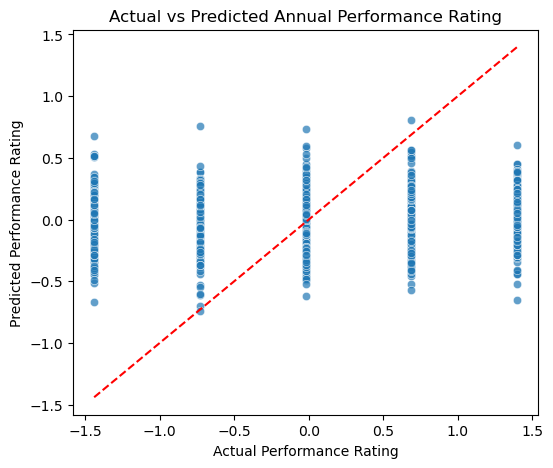

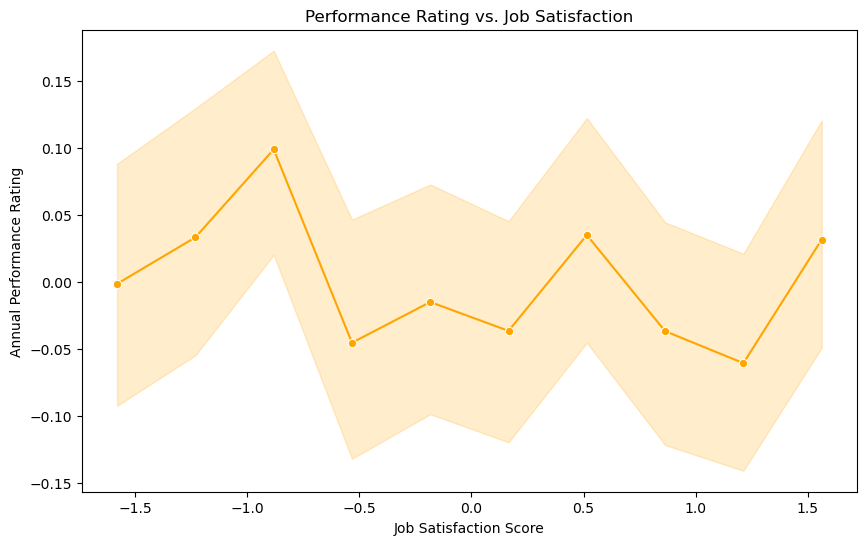

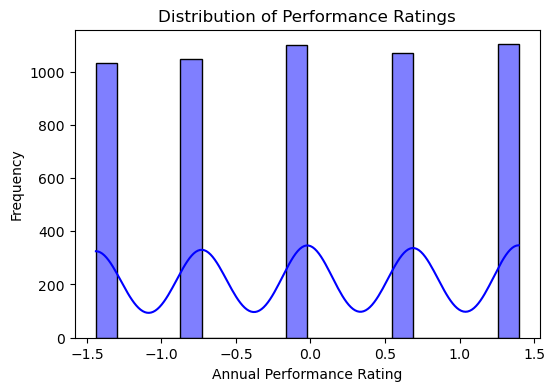

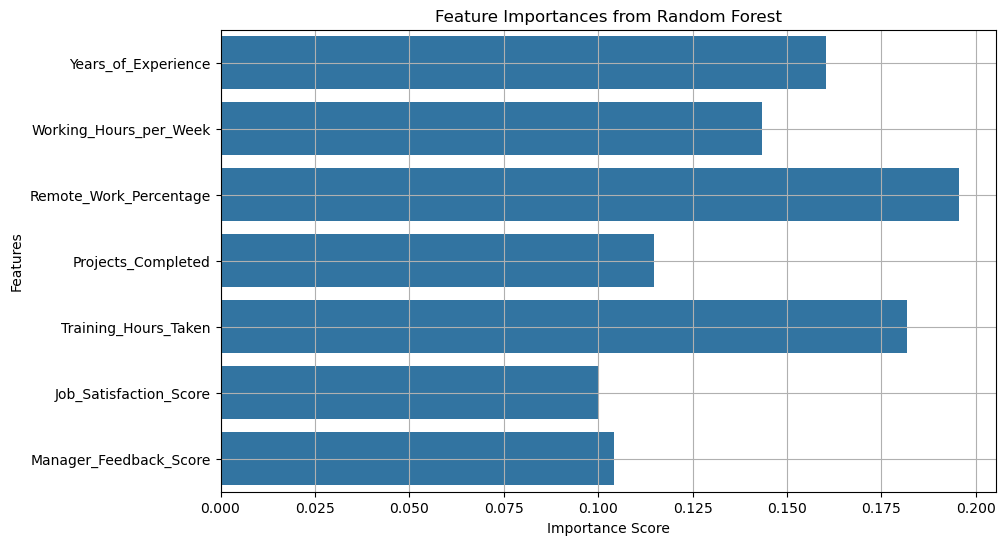

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot: Actual vs. Predicted Performance Rating
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Perfect fit line
plt.xlabel("Actual Performance Rating")
plt.ylabel("Predicted Performance Rating")
plt.title("Actual vs Predicted Annual Performance Rating")
plt.show()

# Line plot for Job Satisfaction vs Performance Rating
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['Job_Satisfaction_Score'], y=df['Annual_Performance_Rating'], marker='o', color='orange')
plt.title('Performance Rating vs. Job Satisfaction')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Annual Performance Rating')
plt.show()

#  Performance Rating Distribution (Histogram)
plt.figure(figsize=(6,4))
sns.histplot(y, bins=20, kde=True, color='blue')
plt.xlabel("Annual Performance Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Performance Ratings")
plt.show()

import numpy as np

feature_importances = rf_regressor.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(True)
plt.show()


In [42]:
########################################## 3. Cluster employees based on performance, work habits, and job satisfaction. #############################

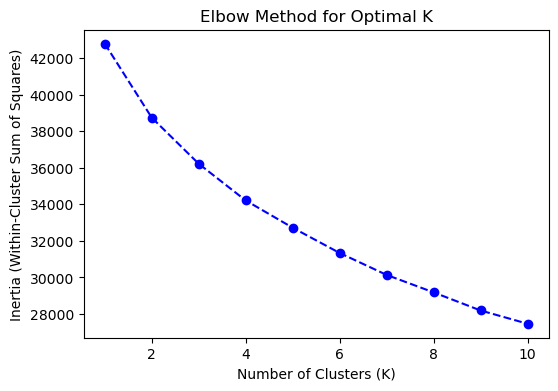

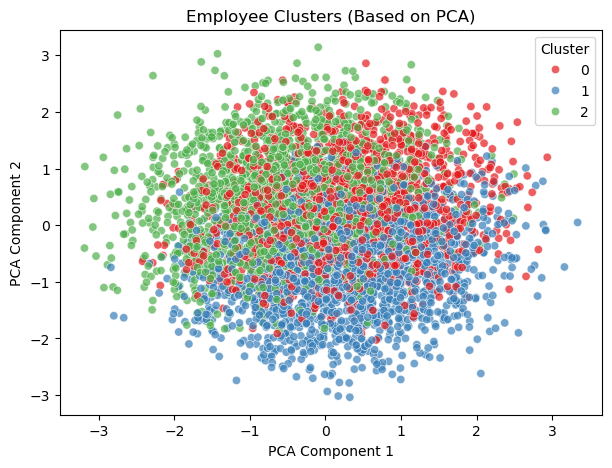

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset (assuming df is your DataFrame)
# df = pd.read_csv('your_data.csv')  # Uncomment if loading from a file

# Define features for clustering (performance, work habits, job satisfaction)
features = ['Years_of_Experience', 'Working_Hours_per_Week', 'Remote_Work_Percentage', 
            'Projects_Completed', 'Training_Hours_Taken', 'Job_Satisfaction_Score', 'Manager_Feedback_Score',
            'Annual_Performance_Rating']

# Ensure the columns exist in the dataset
df = df[features].dropna()  # Remove rows with missing values

# Scale the features (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Use Elbow Method to find optimal K
inertia = []
K_range = range(1, 11)  # Testing 1 to 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()

# Choose K=3 (or based on elbow point)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Use PCA for 2D Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette='Set1', alpha=0.7)
plt.title("Employee Clusters (Based on PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


         Years_of_Experience  Working_Hours_per_Week  Remote_Work_Percentage  \
Cluster                                                                        
0                  18.900549               42.842308               49.947253   
1                  30.823167               45.397412               50.769563   
2                   9.447834               45.054301               46.999390   

         Projects_Completed  Training_Hours_Taken  Job_Satisfaction_Score  \
Cluster                                                                     
0                  7.180220             53.515934                5.602747   
1                  7.327172             50.225508                5.535428   
2                  8.000000             44.179378                5.453935   

         Manager_Feedback_Score  Annual_Performance_Rating  
Cluster                                                     
0                      8.548352                   2.998901  
1                      3.97658

C:\Users\bittu\AppData\Local\Temp\ipykernel_43488\572003142.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Cluster'], y=df[feature], palette='Set2')
C:\Users\bittu\AppData\Local\Temp\ipykernel_43488\572003142.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Cluster'], y=df[feature], palette='Set2')
C:\Users\bittu\AppData\Local\Temp\ipykernel_43488\572003142.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Cluster'], y=df[feature], palette='Set2')


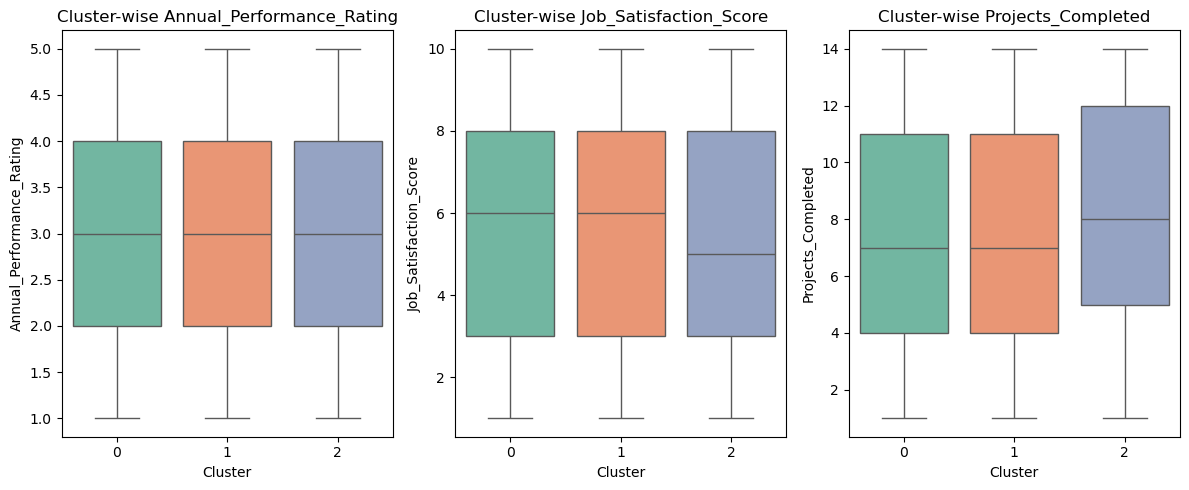

C:\Users\bittu\AppData\Local\Temp\ipykernel_43488\572003142.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='Set1')


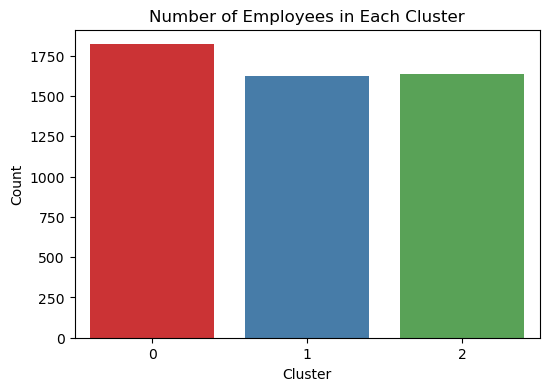

In [98]:
#  Compute Average Values for Each Cluster
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

#  Visualize Key Metrics Across Clusters
features_to_plot = ['Annual_Performance_Rating', 'Job_Satisfaction_Score', 'Projects_Completed']

plt.figure(figsize=(12, 5))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df['Cluster'], y=df[feature], palette='Set2')
    plt.title(f"Cluster-wise {feature}")
    plt.xlabel("Cluster")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

# 3️ Distribution of Employees Across Clusters
plt.figure(figsize=(6, 4))
sns.countplot(x='Cluster', data=df, palette='Set1')
plt.title("Number of Employees in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

